In [71]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 
plt.rcParams['figure.figsize'] = (9,6)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
H0 = np.diag([0,1,2,3])

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [91]:
# Generiere symmetrische Gaussche Zufallsmatrix als Störterm

W = np.random.normal(size = (4,4))
W = .5*(W+W.transpose())

array([[ 0.35982066,  0.20140203,  0.43857725,  0.19851373],
       [ 0.20140203, -0.68418449, -0.76545864, -0.15734327],
       [ 0.43857725, -0.76545864, -0.37740174, -0.69583564],
       [ 0.19851373, -0.15734327, -0.69583564,  0.44617356]])

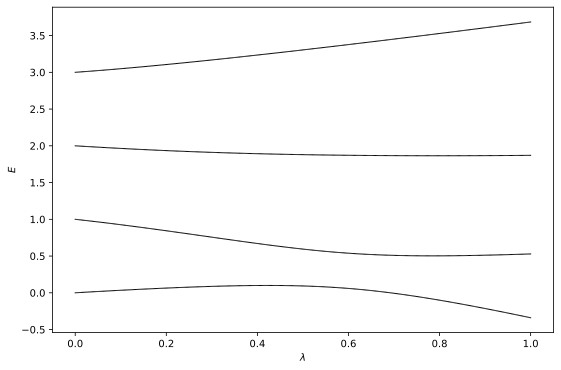

In [92]:
# Plotte Eigenwerte als Funktion des Störparameters lambda

N = 500
lambdamax = 1.0

lam = np.linspace(0, lambdamax, N)
lamrepeated = np.kron(lam, [1,1,1,1])

# Hier werden die Eigenwerte berechnet
Es = np.array([np.sort(np.linalg.eigvals(H0 + l*W)) for l in lam]).flatten()

plt.plot(lamrepeated, Es, ',k')
plt.xlabel("$\lambda$")
plt.ylabel("$E$");

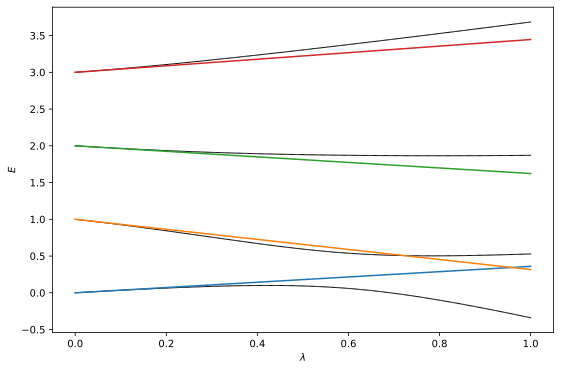

In [93]:
# Vergleich mit erster Ordnung Störtheorie

plt.plot(lamrepeated, Es, ',k') 

for i in range(4): 
    plt.plot(lam, i + W[i,i]*lam) 
    
plt.xlabel("$\lambda$")
plt.ylabel("$E$");

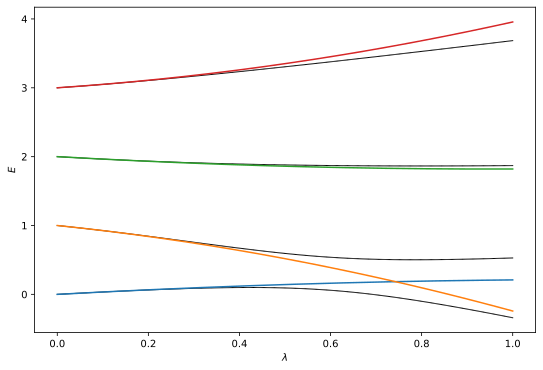

In [94]:
# Vergleich mit zweiter Ordnung Störtheorie

plt.plot(lamrepeated, Es, ',k') 

for i in range(4): 
    plt.plot(lam, i + W[i,i]*lam - sum([0 if i==j else W[j,i]**2/(j - i)*lam**2 for j in range(4)])) 
    
plt.xlabel("$\lambda$")
plt.ylabel("$E$");

Am $E(0)=1$-Eigenwert (orangene Linie) sieht man, dass für endliche Werte des Störparameters, die Qualität der Näherung *nicht* monoton mit der Ordnung besser wird. Für $\lambda \gtrsim .5$ liegt die Kurve erster Ordnung näher an dem wahren Eigenwert als die Kurve zweiter Ordnung. Für reale Probleme benutzt man Störtheorie natürlich immer dann, wenn die wahren Eigenwerte zu schwer zu berechnen sind. Man befindet sich dann in der unangenehmen Situation, dass man a) die Qualität der Näherung nicht streng abschätzen kann, und, schlimmer, b) sich die Qualität nicht einmal sicher verbessert, wenn man mit viel Arbeit höhere Ordnungen ausrechnet. Eine gute allgemeine Lösung für dieses Problem gibt es leider nicht.